In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

1. Предварительная обработка данных

- Загрузить датасет "Apartment for rent classified".

In [29]:
rent = pd.read_csv("apartments_for_rent_classified_10K.csv", encoding='cp1252', sep=';')

- Проанализировать структуру датасета: проверить наличие пропущенных значений и дубликатов.

In [30]:
rent.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [31]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [32]:
rent.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [33]:
rent.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

In [34]:
rent.duplicated().sum()

0

+ Произвести очистку датасета: удалить дубликаты, заполнить или удалить строки с пропущенными значениями.

In [35]:
rent['cityname'] = rent['cityname'].fillna(rent['cityname'].mode()[0])
rent['state'] = rent['state'].fillna(rent['state'].mode()[0])
rent['latitude'] = rent['latitude'].fillna(rent['latitude'].mean())
rent['longitude'] = rent['longitude'].fillna(rent['longitude'].mean())
rent['pets_allowed'] = rent['pets_allowed'].fillna(rent['pets_allowed'].mode()[0])
rent['amenities'] = rent['amenities'].fillna(rent['amenities'].mode()[0])
rent = rent.drop(['address', 'bedrooms', 'bathrooms'],axis=1) # bedrooms и bathrooms высокие корреляции, address - шум
rent.isnull().sum()

id               0
category         0
title            0
body             0
amenities        0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64

+ Преобразовать категориальные переменные в числовой формат с использованием one-hot encoding или других методов

In [36]:
le = LabelEncoder()
rent['has_photo'] = le.fit_transform(rent['has_photo'])
rent['pets_allowed'] = le.fit_transform(rent['pets_allowed'])
rent['cityname'] = le.fit_transform(rent['cityname'])
rent['state'] = le.fit_transform(rent['state'])
rent['source'] = le.fit_transform(rent['source'])
# остальные категориальные признаки будут удалены
rent.head()

,id,category,title,body,amenities,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",Parking,USD,No,1,1,790,$790,Monthly,101,1468,7,38.9057,-76.9861,9,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",Parking,USD,No,1,1,425,$425,Monthly,106,449,15,37.9680,-87.6621,9,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",Parking,USD,No,1,1,1390,"$1,390",Monthly,107,52,45,38.8910,-77.0816,9,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",Parking,USD,No,1,1,925,$925,Monthly,116,1285,47,47.6160,-122.3275,9,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",Parking,USD,No,1,1,880,$880,Monthly,125,52,45,38.8738,-77.1055,9,1577359401


+ Выделить признаки и целевую переменную из датасета

In [37]:
rent['y'] = rent['price'] >= 1000
rent['y'] = le.fit_transform(rent['y'])
rent = rent.drop(['id','currency', 'category', 'fee', 'price_type', 'price_display', 'title', 'body'], axis=1)
rent = rent.join(rent['amenities'].str.get_dummies(',').astype(int))
rent = rent.drop('amenities', axis=1)

2. Визуализация данных

+ Исследовать распределения категориальных и числовых признаков (выделить гистограммы, боксплоты и диаграммы рассеяния).

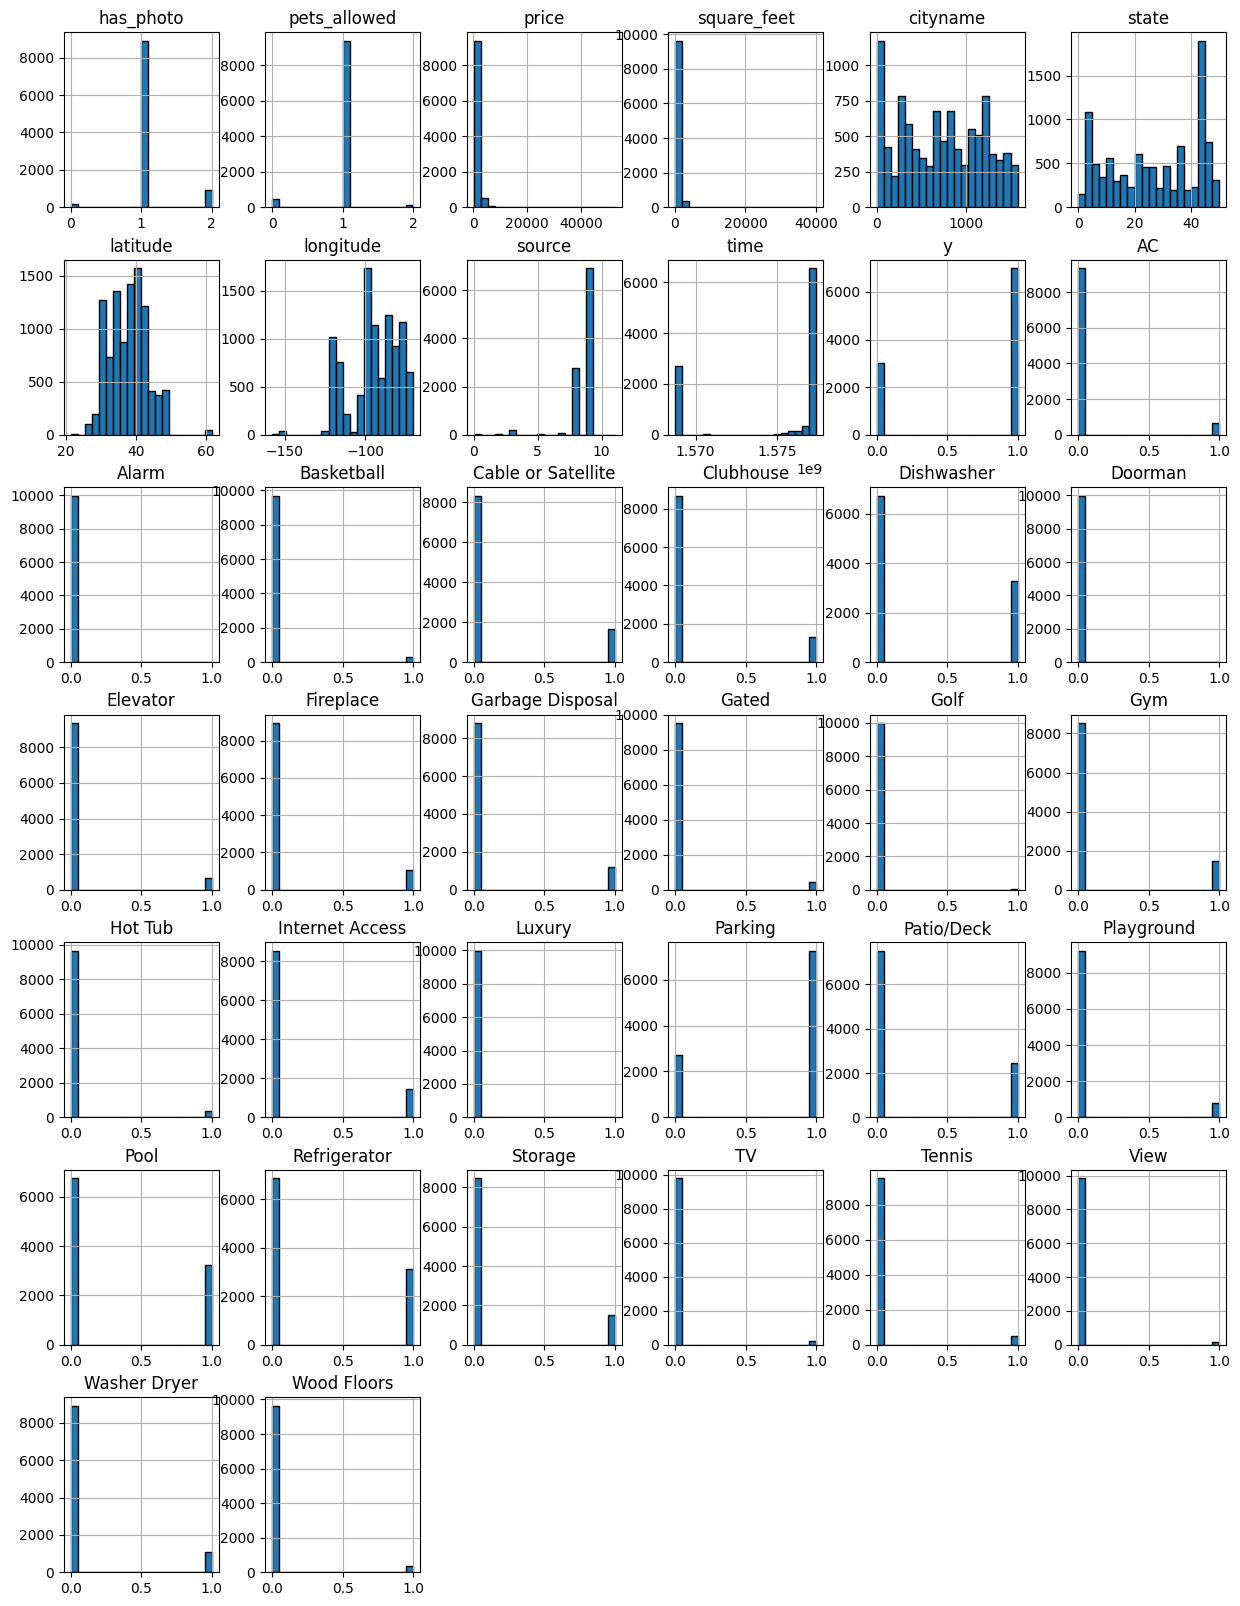

In [38]:
rent.hist(bins=20, figsize=(15,20), edgecolor='k')
plt.show()

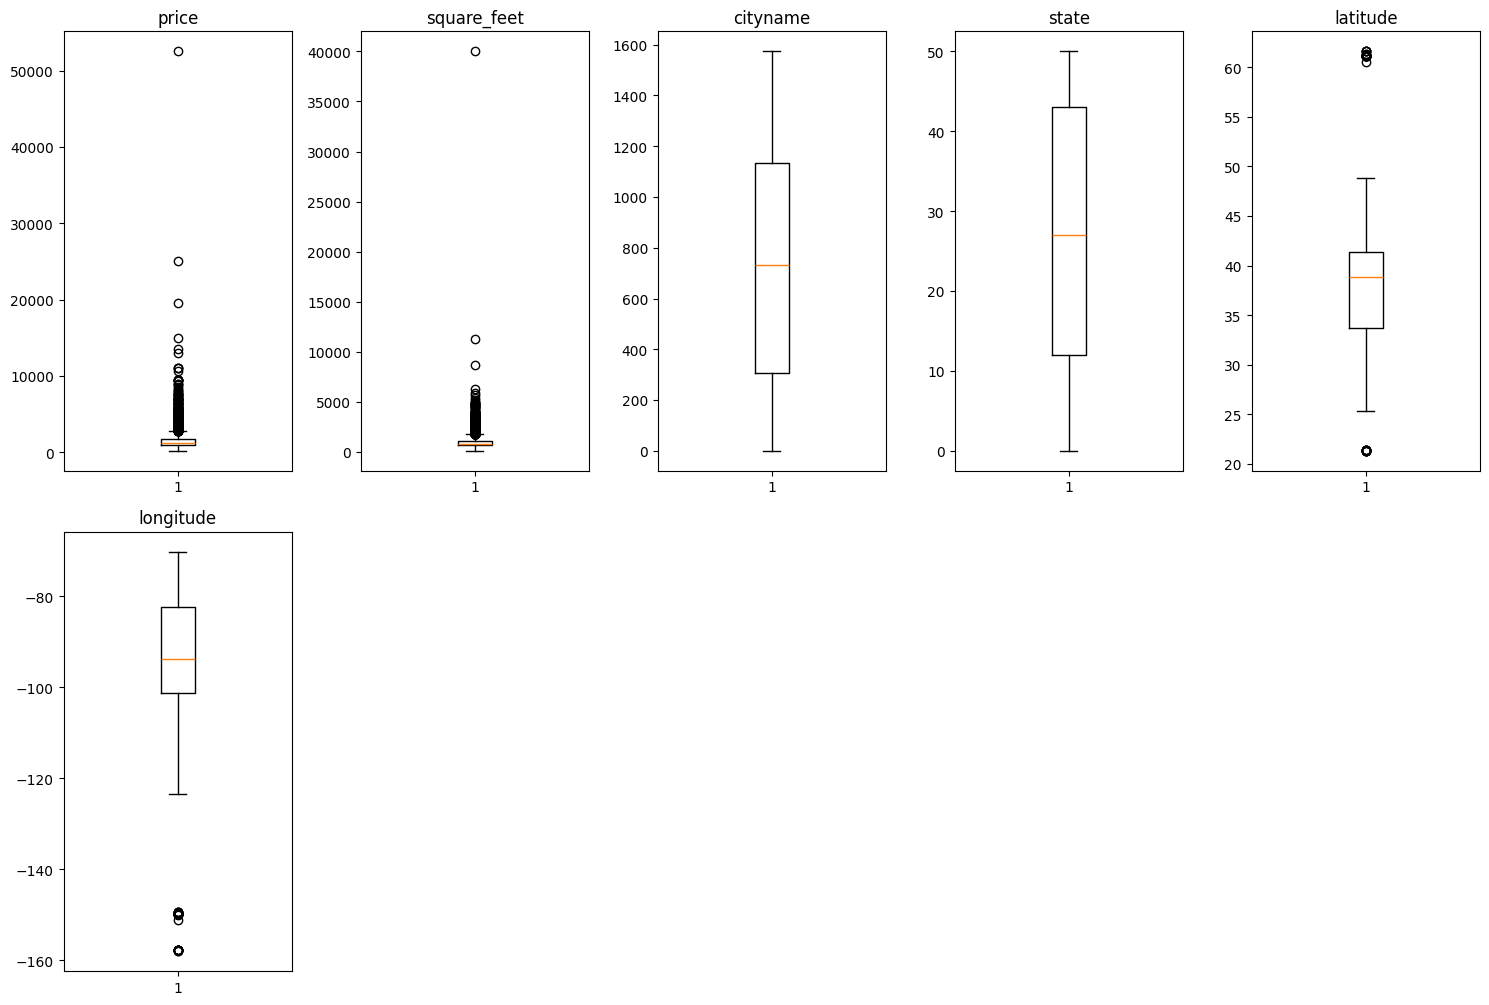

In [39]:
plt.figure(figsize=(15, 100))
cols = ['price', 'square_feet', 'cityname', 'state', 'latitude', 'longitude']
for col in cols:
    plt.subplot(20, 5, len(plt.gcf().get_axes()) + 1)  
    plt.boxplot(rent[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

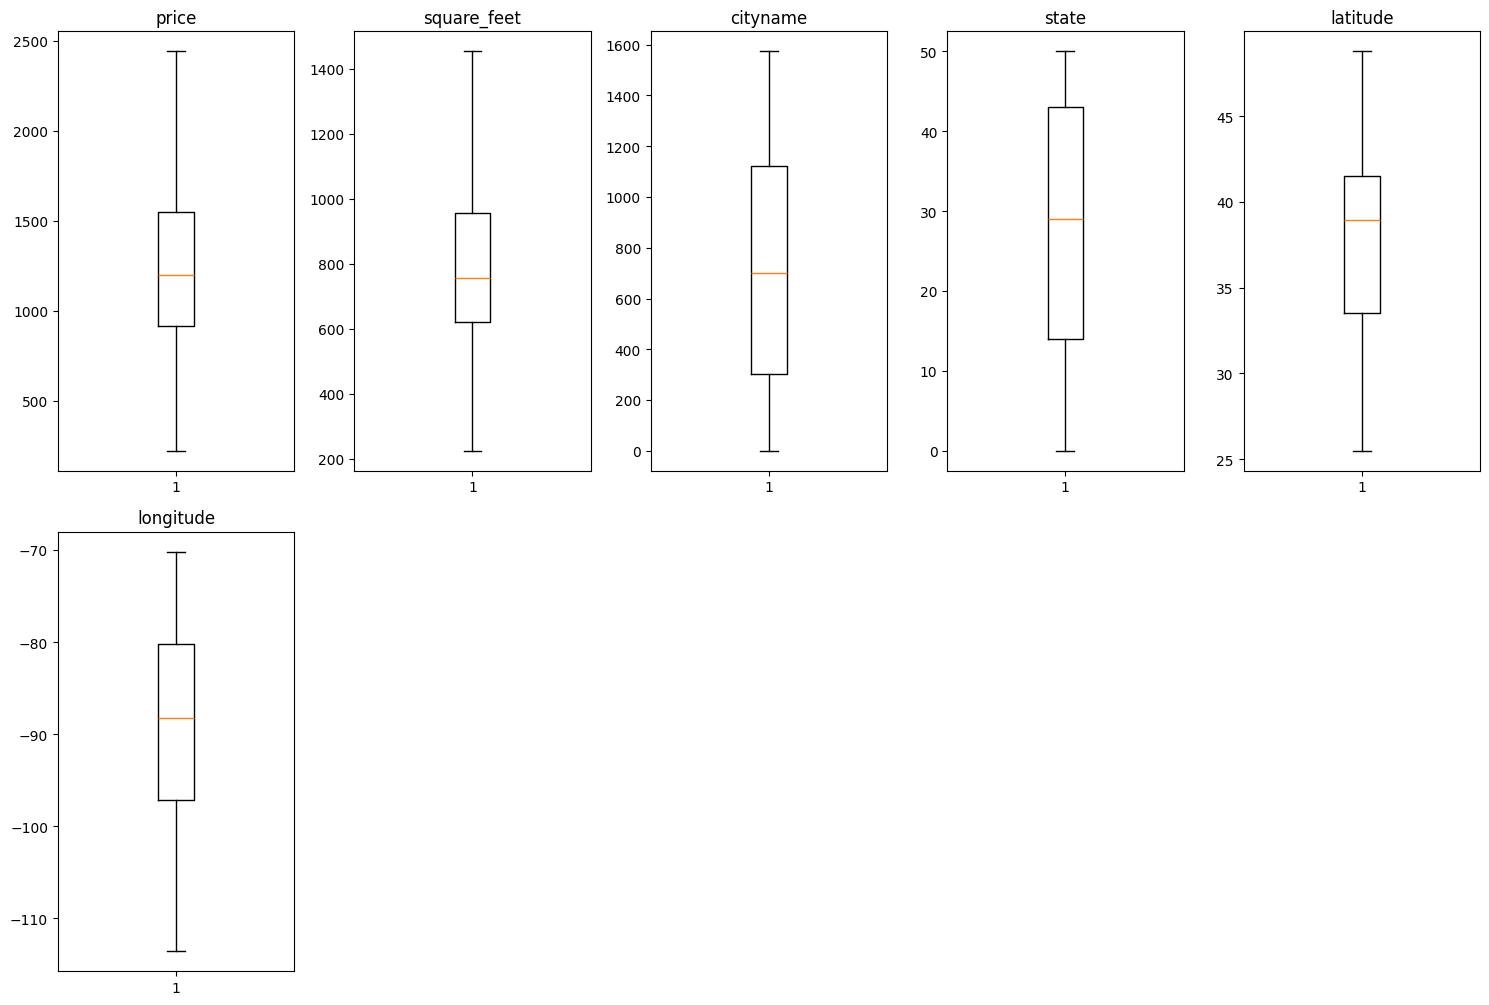

In [40]:
def drop_outliers(rent, col):
   Q1 = rent[col].quantile(0.25)
   Q3 = rent[col].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - IQR
   upper_bound = Q3 + IQR
   return rent[(rent[col] >= lower_bound) & (rent[col] <= upper_bound)].copy()

plt.figure(figsize=(15, 100))
cols = ['price', 'square_feet', 'cityname', 'state', 'latitude', 'longitude']
for col in cols:
    rent = drop_outliers(rent, col)
    plt.subplot(20, 5, len(plt.gcf().get_axes()) + 1)  
    plt.boxplot(rent[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

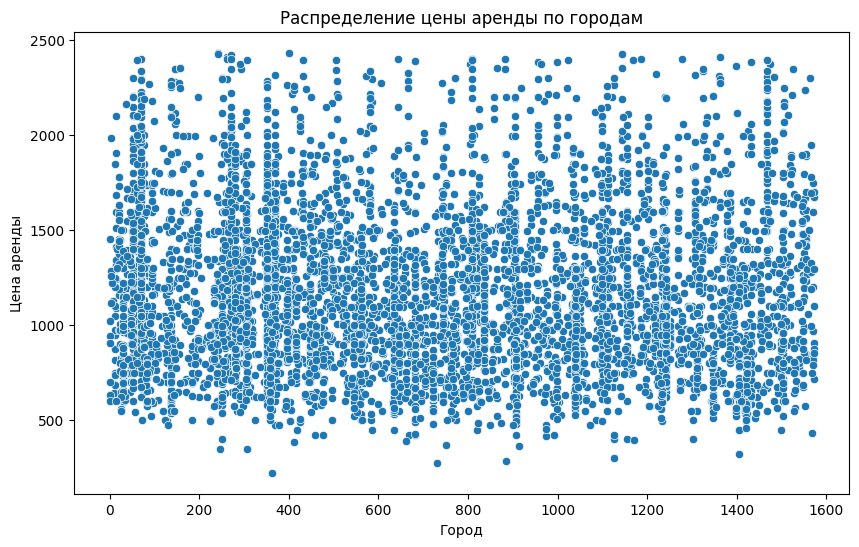

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cityname', y='price', data=rent)
plt.title('Распределение цены аренды по городам')
plt.xlabel('Город')
plt.ylabel('Цена аренды')
plt.show()

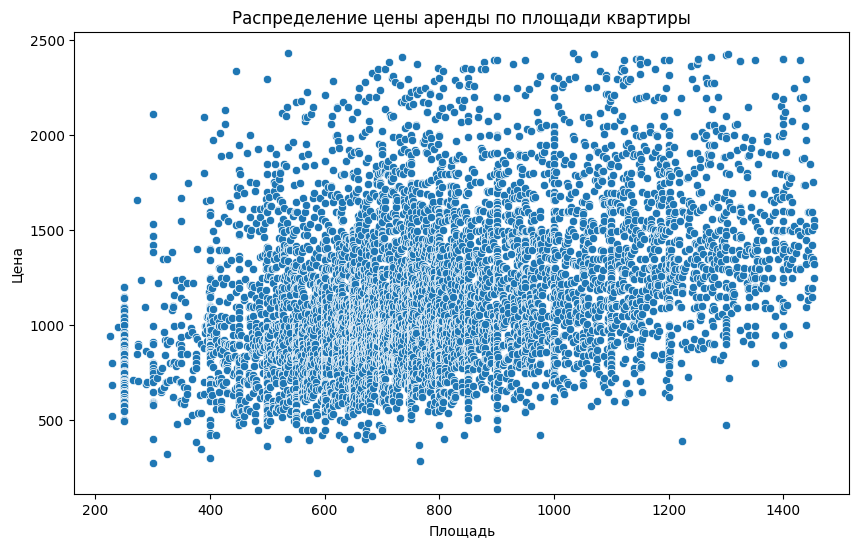

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_feet', y='price', data=rent)
plt.title('Распределение цены аренды по площади квартиры')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

+ Проверить наличие корреляции между признаками с помощью тепловой карты или матрицы корреляции.

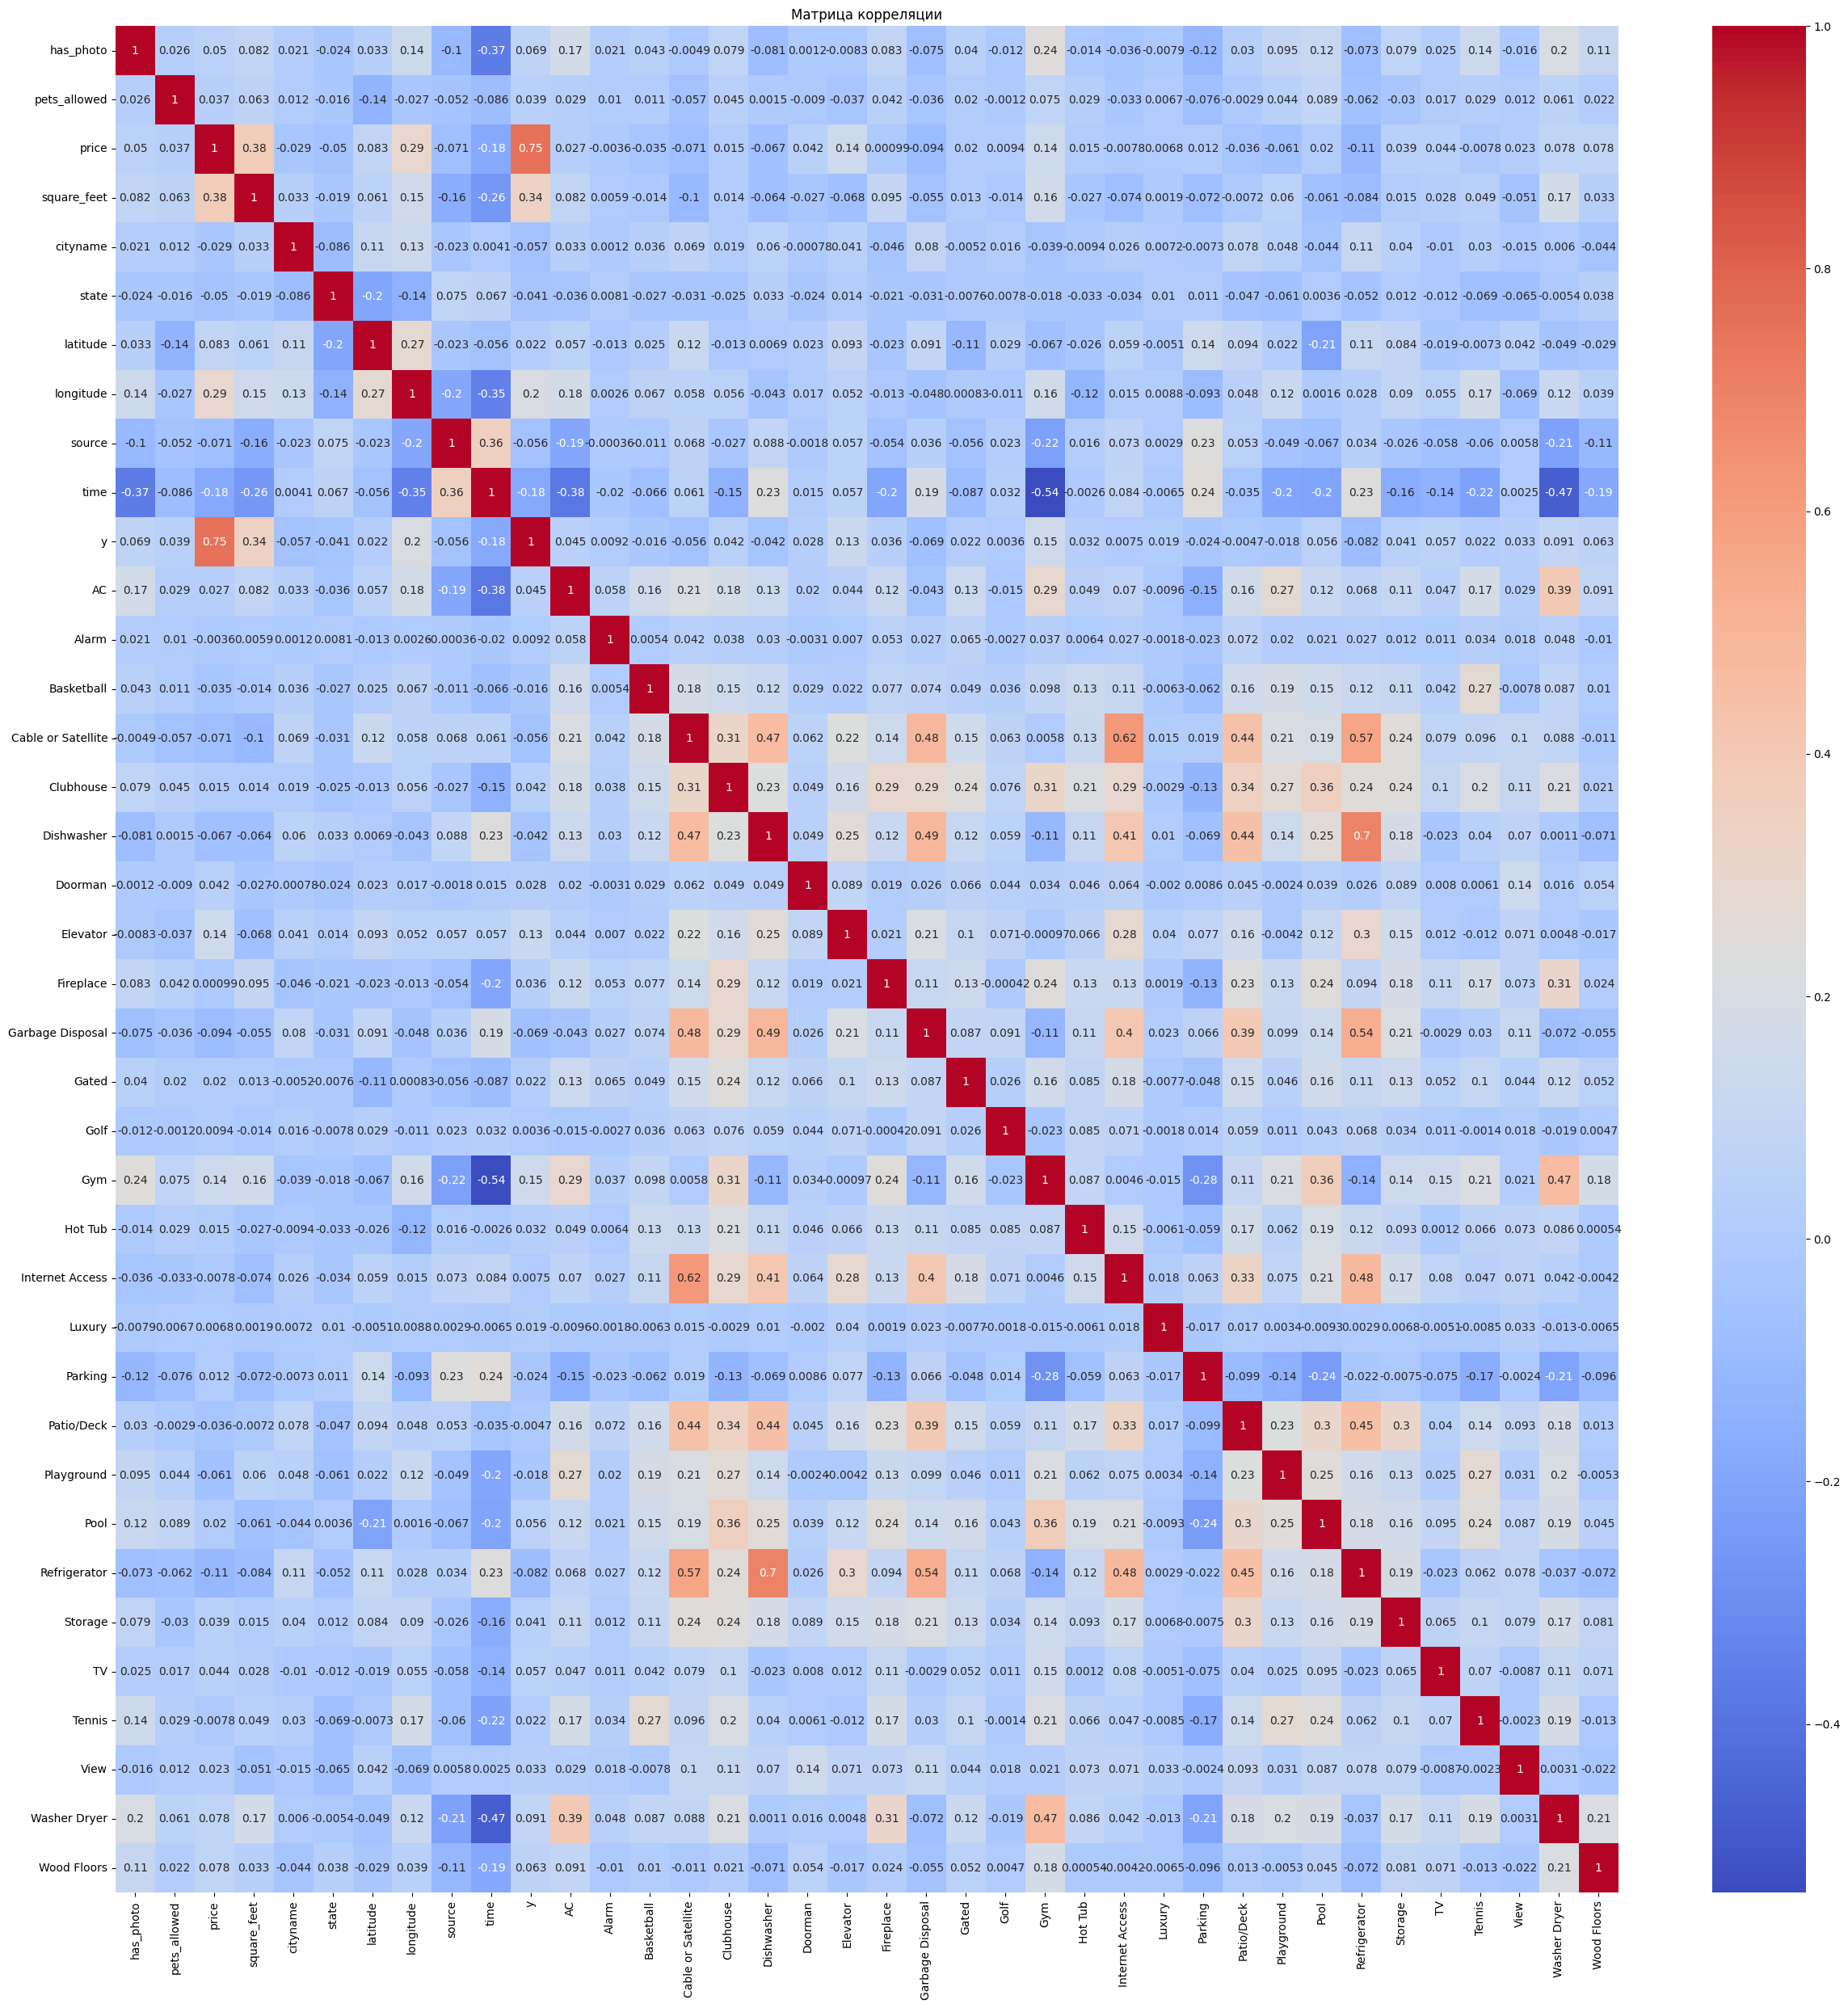

In [43]:
correlation_matrix = rent.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Матрица корреляции")
plt.show()

+ Визуализировать целевую переменную, чтобы оценить баланс классов.

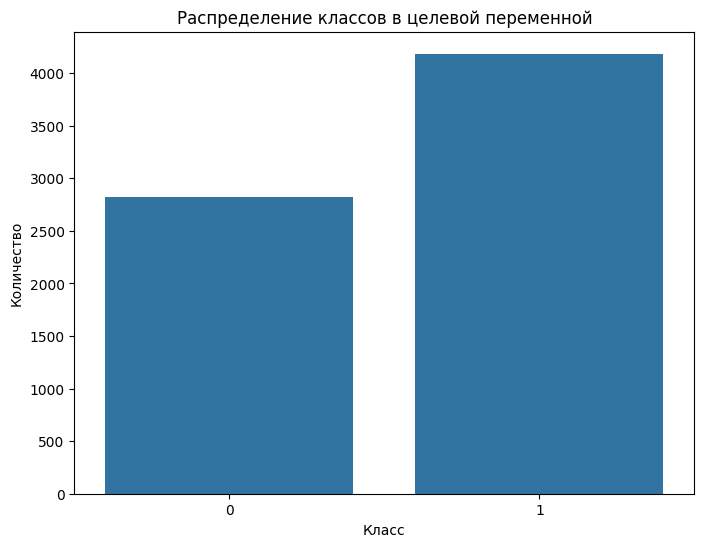

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(data=rent, x='y')
plt.title('Распределение классов в целевой переменной')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

3. Построение классификации

+ Произвести масштабирование признаков с применением стандартизации или нормализации.

In [45]:
scaler = StandardScaler()
rent = rent.drop('price', axis=1)

cols = rent.columns[rent.columns != 'y']
rent[cols] = scaler.fit_transform(rent[cols])

rent.head()

,has_photo,pets_allowed,square_feet,cityname,state,latitude,longitude,source,time,y,...,Patio/Deck,Playground,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors
40,-0.234317,-4.031064,-2.250852,-0.895954,-1.009710,0.962463,0.122632,0.437364,0.680466,0,...,-0.622197,-0.324673,-0.789323,1.408780,-0.458772,-0.14943,-0.250303,-0.115361,-0.372114,-0.193175
42,-0.234317,0.198655,-2.231433,-0.363372,-0.077899,-0.374639,0.783608,0.437364,0.499882,0,...,-0.622197,-0.324673,-0.789323,-0.709834,-0.458772,-0.14943,-0.250303,-0.115361,-0.372114,-0.193175
43,-0.234317,0.198655,-2.231433,1.855720,-1.368098,-1.889874,0.668027,0.437364,0.590786,0,...,-0.622197,-0.324673,-0.789323,-0.709834,-0.458772,-0.14943,-0.250303,-0.115361,-0.372114,-0.193175
44,-0.234317,0.198655,-2.231433,0.387872,0.997267,-0.395365,-0.108064,0.437364,0.680531,0,...,-0.622197,-0.324673,-0.789323,-0.709834,-0.458772,-0.14943,-0.250303,-0.115361,-0.372114,-0.193175
47,-0.234317,0.198655,-2.196480,1.693348,-1.511454,0.368144,1.207312,0.437364,0.680495,0,...,-0.622197,-0.324673,-0.789323,-0.709834,-0.458772,-0.14943,-0.250303,-0.115361,-0.372114,-0.193175


+ Разделить данные на тренировочный и тестовый наборы

In [46]:
X = rent.drop(['y'], axis=1)
y = rent['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 4903
Размер тестовой выборки: 2102


+ Построить модель классификации, например, с использованием линейного классификатора (например, логистическая регрессия) или алгоритма случайного леса.

In [47]:
reg_model = LogisticRegression(max_iter=20000)
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

+ Оценить качество модели с помощью метрик, таких как accuracy, precision, recall и f1-score.

In [48]:
print("Точность (accuracy):", accuracy_score(y_test, y_pred))
print("Точность (precision):", precision_score(y_test, y_pred))
print("Полнота:", recall_score(y_test, y_pred))
print("F1-мера:", f1_score(y_test, y_pred))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

Точность (accuracy): 0.7050428163653664
Точность (precision): 0.7313101406365655
Полнота: 0.793574297188755
F1-мера: 0.7611710323574731
Матрица ошибок:
[[494 363]
 [257 988]]


+ Произвести настройку параметров модели с использованием кросс-валидации или гиперпараметров.

In [49]:
y_pred_cv = cross_val_predict(reg_model, X, y, cv=5)
print("Точность (Accuracy) после кросс-валидации: ", accuracy_score(y, y_pred_cv))
print("Точность (Precision) после кросс-валидации: ", precision_score(y, y_pred_cv))
print("Полнота (Recall) после кросс-валидации: ", recall_score(y, y_pred_cv))
print("F1-мера после кросс-валидации: ", f1_score(y, y_pred_cv))
print("Матрица ошибок после кросс-валидации:")
print(confusion_matrix(y, y_pred_cv))

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(estimator=reg_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Оптимальные гиперпараметры:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность на тестовом наборе:", accuracy)

Точность (Accuracy) после кросс-валидации:  0.6592433975731621
Точность (Precision) после кросс-валидации:  0.7115972712302987
Полнота (Recall) после кросс-валидации:  0.7226469182990922
F1-мера после кросс-валидации:  0.7170795306388527
Матрица ошибок после кросс-валидации:
[[1593 1226]
 [1161 3025]]
Оптимальные гиперпараметры: {'C': 10}
Точность на тестовом наборе: 0.7059942911512845


4. Визуализация результатов классификации

+ Визуализировать предсказания модели на тестовом наборе данных

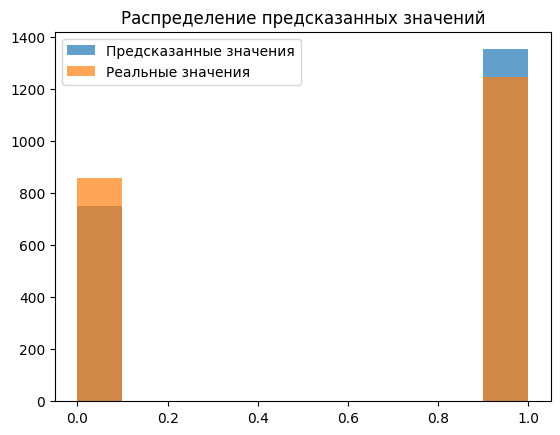

In [50]:
plt.hist(y_pred, alpha=0.7, label='Предсказанные значения')
plt.hist(y_test, alpha=0.7, label='Реальные значения')
plt.title('Распределение предсказанных значений')
plt.legend()
plt.show()


+ Построить матрицу ошибок для оценки результатов классификации

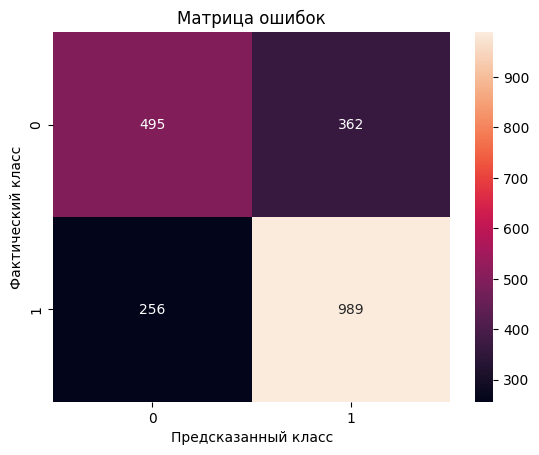

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.show()


+ Построить ROC-кривую для анализа производительности модели

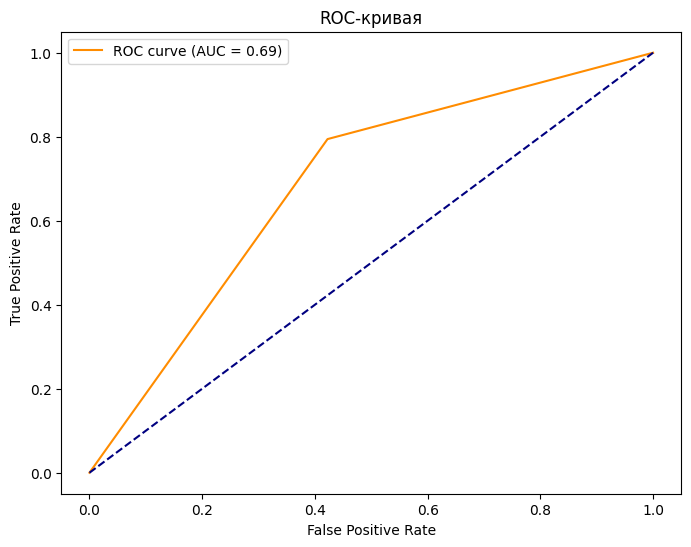

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

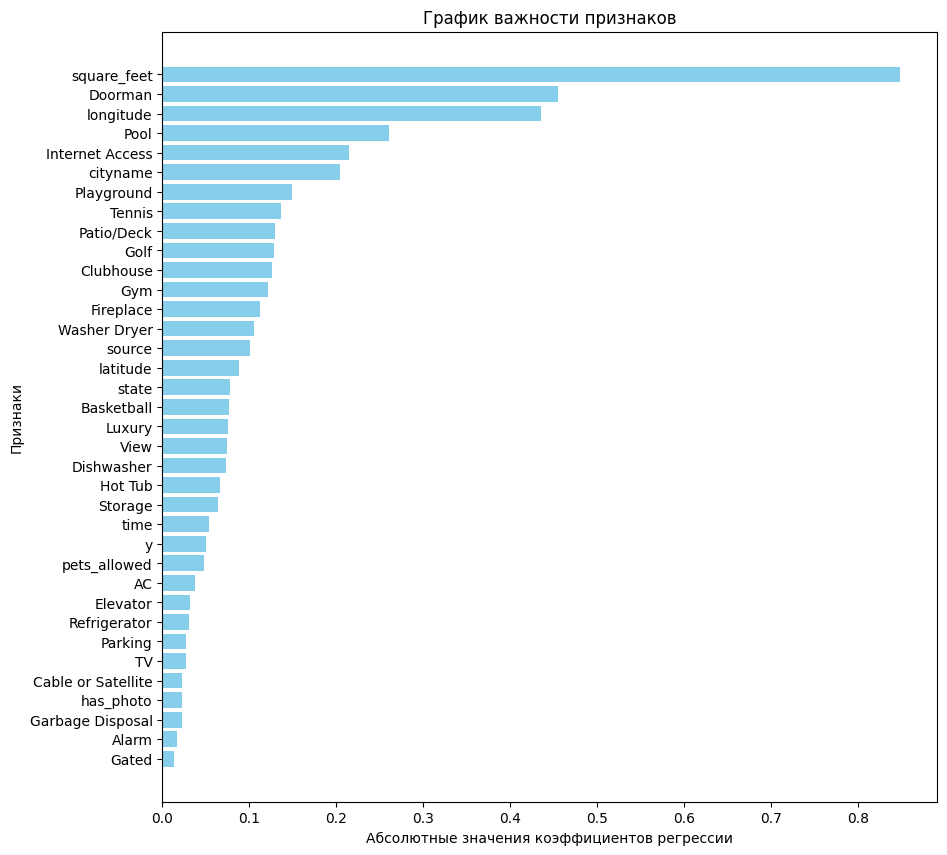

In [53]:

coef_abs = abs(reg_model.coef_[0])
features = rent.columns  
sorted_idx = coef_abs.argsort()
plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), coef_abs[sorted_idx], align="center", color="skyblue")
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.title('График важности признаков')
plt.xlabel('Абсолютные значения коэффициентов регрессии')
plt.ylabel('Признаки')
plt.show()

5. Оценка модели

+ Сравнить результаты полученной модели с другими моделями, такими как метод опорных векторов или к ближайших соседей

In [54]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

lr_predictions = reg_model.predict(X_test)
print("Логистическая регрессия:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Precision:", precision_score(y_test, lr_predictions))
print("Recall:", recall_score(y_test, lr_predictions))
print("F1 Score:", f1_score(y_test, lr_predictions))
print("\n")

svm_predictions = svm_model.predict(X_test)
print("Метод опорных векторов (SVM):")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions))
print("Recall:", recall_score(y_test, svm_predictions))
print("F1 Score:", f1_score(y_test, svm_predictions))
print("\n")

knn_predictions = knn_model.predict(X_test)
print("k ближайших соседей")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions))
print("Recall:", recall_score(y_test, knn_predictions))
print("F1 Score:", f1_score(y_test, knn_predictions))

Логистическая регрессия:
Accuracy: 0.7050428163653664
Precision: 0.7313101406365655
Recall: 0.793574297188755
F1 Score: 0.7611710323574731


Метод опорных векторов (SVM):
Accuracy: 0.7488106565176023
Precision: 0.7595944967414917
Recall: 0.8425702811244979
F1 Score: 0.7989337395277989


k ближайших соседей
Accuracy: 0.7216936251189343
Precision: 0.7570093457943925
Recall: 0.7807228915662651
F1 Score: 0.7686832740213523
